In [26]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
import pandas as pd
import numpy as np
%matplotlib inline

In [27]:
X,y = make_blobs(n_samples=1000,centers=3,n_features=2)

In [28]:
X

array([[  4.8617751 ,  -8.31064223],
       [  6.1659213 , -10.26042106],
       [ -0.7813042 ,  -7.2654608 ],
       ...,
       [  6.07253208, -10.00945889],
       [  4.55850847,  -9.53469075],
       [  5.88516158,  -4.21788304]])

In [29]:
y

array([0, 0, 1, 2, 2, 1, 2, 0, 1, 1, 1, 2, 0, 0, 0, 2, 0, 1, 0, 2, 1, 0,
       0, 1, 1, 1, 0, 2, 0, 2, 2, 2, 0, 2, 1, 2, 1, 0, 2, 2, 1, 0, 0, 0,
       2, 0, 1, 0, 0, 1, 2, 1, 1, 1, 1, 0, 2, 2, 2, 0, 2, 1, 0, 0, 1, 0,
       2, 0, 2, 0, 0, 0, 2, 0, 2, 1, 0, 1, 0, 1, 2, 2, 1, 2, 1, 1, 0, 1,
       1, 2, 2, 2, 1, 1, 0, 2, 1, 0, 0, 1, 2, 0, 0, 2, 0, 2, 2, 0, 0, 0,
       0, 2, 1, 1, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 0, 1, 2, 1, 2,
       1, 2, 0, 2, 0, 0, 2, 0, 1, 2, 2, 1, 1, 1, 2, 0, 0, 2, 0, 2, 1, 0,
       2, 1, 1, 1, 0, 2, 2, 1, 2, 0, 2, 0, 1, 2, 0, 2, 1, 1, 1, 1, 0, 2,
       1, 1, 1, 2, 0, 0, 0, 0, 1, 0, 1, 1, 2, 0, 0, 1, 2, 1, 2, 1, 2, 0,
       1, 1, 2, 1, 1, 0, 0, 0, 1, 2, 2, 0, 2, 1, 1, 1, 2, 2, 0, 2, 1, 0,
       2, 1, 0, 2, 2, 2, 2, 2, 2, 0, 1, 1, 1, 1, 2, 2, 0, 0, 0, 0, 2, 2,
       1, 1, 0, 2, 2, 2, 1, 2, 1, 1, 1, 0, 1, 1, 1, 0, 2, 0, 1, 0, 2, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 2, 1, 2, 2, 2, 2, 2,
       0, 1, 2, 2, 0, 0, 0, 2, 0, 0, 2, 1, 1, 0, 1,

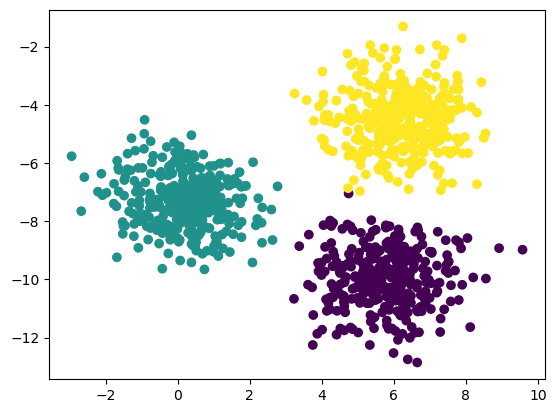

In [30]:
plt.scatter(X[:,0],X[:,1],c=y)

In [31]:
## Standardization--feature scaling technique
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [32]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.33, random_state=42)


In [33]:
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [34]:
from sklearn.cluster import KMeans

In [35]:
## Elbow method To Select K value
wcss=[]
for k in range(1,11):
    kmeans = KMeans(n_clusters=k,init='k-means++')
    kmeans.fit(X_train_scaled)
    wcss.append(kmeans.inertia_)

C:\Users\THALA\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\THALA\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\THALA\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\THALA\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of

In [36]:
wcss

[1339.9999999999995,
 718.1600859240536,
 192.63739362215546,
 163.86412085626083,
 140.64861275446742,
 118.48573052868507,
 105.53263227661607,
 94.35022711626134,
 83.38820450915114,
 76.00858396359136]

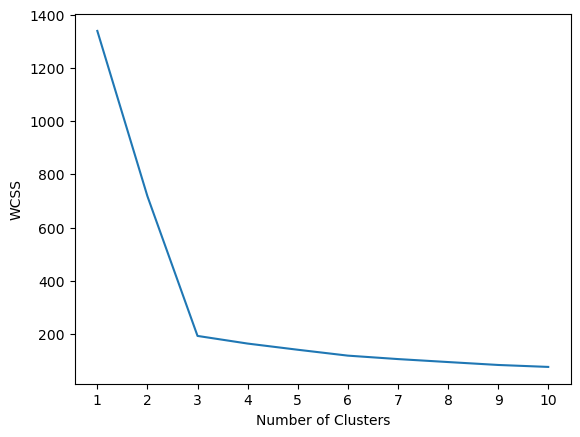

In [37]:
## plot elbow curve
plt.plot(range(1,11),wcss)
plt.xticks(range(1,11))
plt.xlabel("Number of Clusters")
plt.ylabel('WCSS')
plt.show()

In [38]:
kmeans= KMeans(n_clusters=3,init='k-means++')

In [39]:
kmeans.fit_predict(X_train_scaled)

C:\Users\THALA\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


array([1, 0, 1, 0, 2, 0, 1, 0, 0, 1, 0, 2, 1, 1, 1, 0, 0, 1, 0, 0, 2, 1,
       0, 2, 2, 0, 1, 2, 0, 1, 2, 2, 0, 2, 0, 2, 0, 1, 2, 0, 0, 1, 1, 1,
       0, 1, 0, 2, 2, 1, 2, 1, 2, 0, 0, 2, 0, 1, 2, 2, 2, 2, 1, 2, 1, 0,
       2, 1, 0, 2, 1, 2, 0, 1, 0, 0, 1, 0, 1, 0, 2, 1, 0, 2, 2, 0, 0, 1,
       1, 2, 2, 0, 2, 0, 0, 1, 0, 1, 1, 2, 0, 1, 1, 2, 1, 2, 2, 1, 0, 0,
       0, 1, 0, 0, 1, 2, 2, 1, 1, 1, 1, 0, 2, 2, 1, 1, 1, 2, 2, 0, 0, 1,
       2, 0, 2, 2, 0, 2, 0, 0, 1, 1, 2, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0, 1,
       1, 2, 2, 1, 0, 1, 2, 2, 0, 0, 1, 1, 0, 2, 0, 1, 0, 1, 0, 0, 0, 1,
       0, 2, 1, 0, 2, 1, 2, 0, 0, 1, 2, 0, 1, 2, 1, 1, 2, 0, 0, 2, 2, 2,
       2, 1, 2, 0, 1, 0, 0, 2, 2, 1, 2, 0, 0, 1, 2, 0, 1, 1, 1, 2, 0, 1,
       0, 2, 1, 0, 0, 1, 0, 1, 1, 2, 1, 0, 2, 2, 1, 1, 1, 1, 2, 1, 0, 0,
       2, 0, 1, 1, 0, 2, 2, 0, 0, 0, 2, 0, 1, 1, 1, 0, 0, 0, 0, 2, 0, 2,
       2, 0, 1, 1, 2, 2, 1, 2, 2, 1, 2, 1, 2, 1, 2, 2, 2, 1, 0, 0, 2, 2,
       0, 2, 2, 2, 2, 1, 0, 1, 2, 2, 2, 2, 1, 0, 1,

In [40]:
y_pred=kmeans.fit_predict(X_test_scaled)

C:\Users\THALA\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [41]:
y_pred

array([0, 2, 1, 1, 0, 2, 0, 1, 1, 2, 1, 2, 1, 1, 0, 2, 1, 0, 2, 2, 0, 2,
       2, 2, 0, 0, 2, 2, 0, 2, 2, 2, 2, 0, 0, 1, 1, 0, 0, 2, 2, 1, 0, 1,
       2, 2, 2, 2, 1, 0, 0, 1, 2, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 2, 2, 2,
       0, 1, 2, 2, 2, 0, 2, 0, 2, 0, 1, 0, 0, 2, 0, 0, 1, 2, 1, 1, 2, 0,
       0, 2, 0, 1, 2, 1, 2, 0, 1, 1, 2, 0, 0, 2, 2, 1, 0, 0, 0, 0, 2, 2,
       2, 2, 0, 2, 2, 2, 1, 2, 0, 2, 1, 1, 2, 1, 2, 0, 2, 1, 1, 2, 1, 1,
       2, 1, 2, 2, 1, 0, 1, 0, 0, 0, 1, 0, 2, 1, 1, 2, 2, 0, 0, 2, 0, 0,
       0, 0, 2, 0, 0, 1, 1, 2, 0, 0, 1, 2, 1, 2, 1, 2, 2, 0, 2, 1, 1, 0,
       1, 2, 0, 2, 0, 0, 1, 2, 2, 2, 1, 2, 0, 2, 2, 0, 2, 1, 1, 2, 0, 0,
       2, 2, 0, 1, 2, 0, 2, 0, 2, 0, 1, 1, 2, 0, 2, 2, 1, 1, 2, 0, 2, 2,
       1, 0, 2, 1, 2, 1, 2, 2, 0, 2, 2, 1, 2, 2, 0, 0, 1, 0, 0, 0, 0, 2,
       1, 2, 1, 2, 2, 1, 1, 2, 1, 2, 1, 1, 0, 1, 0, 1, 0, 1, 2, 0, 2, 2,
       1, 0, 0, 2, 1, 2, 1, 1, 2, 1, 0, 1, 0, 1, 0, 1, 1, 1, 2, 2, 1, 1,
       0, 1, 0, 0, 1, 0, 0, 2, 2, 1, 0, 0, 2, 1, 2,

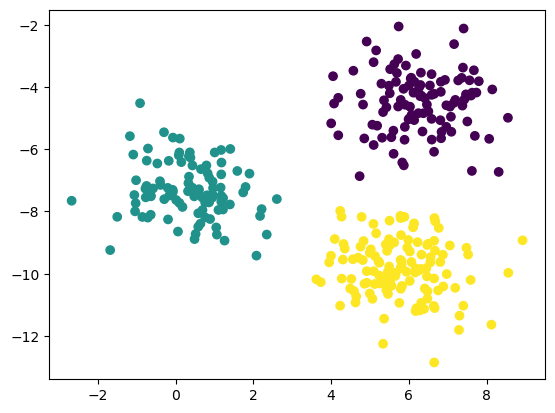

In [42]:
plt.scatter(X_test[:,0],X_test[:,1],c=y_pred)

In [43]:
## Validating the k value
## kneelocator
## Silhouetee scoring

In [44]:
## kneelocator
!pip install kneed

In [45]:
from kneed import KneeLocator
kl=KneeLocator(range(1,11),wcss,curve='convex',direction='decreasing')
kl.elbow

3

In [46]:
## Silhouette score
from sklearn.metrics import silhouette_score

In [47]:
silhouette_coefficients=[]
for k in range(2,11):
    kmeans=KMeans(n_clusters=k,init='k-means++')
    kmeans.fit(X_train_scaled)
    score=silhouette_score(X_train_scaled,kmeans.labels_)
    silhouette_coefficients.append(score)

C:\Users\THALA\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\THALA\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\THALA\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\THALA\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of

In [48]:
silhouette_coefficients

[0.4844262248975972,
 0.679991250207651,
 0.5544181910737205,
 0.42409647975410014,
 0.33740852931338594,
 0.3351757062389923,
 0.338331307063656,
 0.34172456712557,
 0.334549982122176]

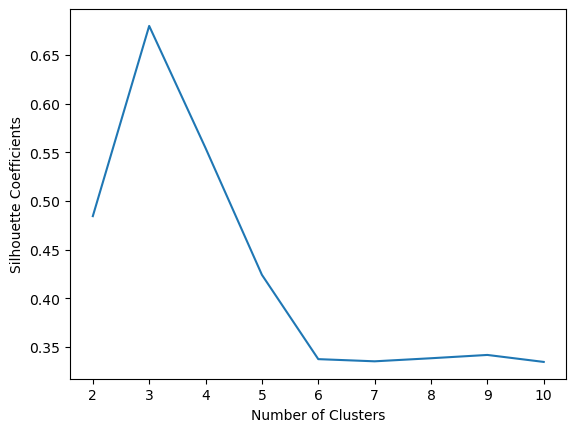

In [49]:
## plotting silhouette score
plt.plot(range(2,11),silhouette_coefficients)
plt.xticks(range(2,11))
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Coefficients")
plt.show()